# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [31]:
from lakemodel_function import lake_problem
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_problem)
lake_model.time_steps = 100 # used to specify the number of timesteps

#specify uncertainties
lake_model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                            RealParameter('stdev', 0.001, 0.005),
                            RealParameter('b', 0.1, 0.45),
                            RealParameter('q', 2.0, 4.5),
                            RealParameter('delta', 0.93, 0.99)]

# set levers, one for each time step
lake_model.levers = [RealParameter('l' + str(i), 0, 0.1) for i in 
                     range(100)] 

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P'),
                       ScalarOutcome('utility'),
                       ScalarOutcome('inertia'),
                       ScalarOutcome('reliability')]

In [7]:
#Generate 10 policies and 1000 scenarios and evaluate them.
from ema_workbench import perform_experiments, ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

n_scenarios = 1000
results = perform_experiments(lake_model, n_scenarios, 10)

[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished


[MainProcess/INFO] no time dimension found in results


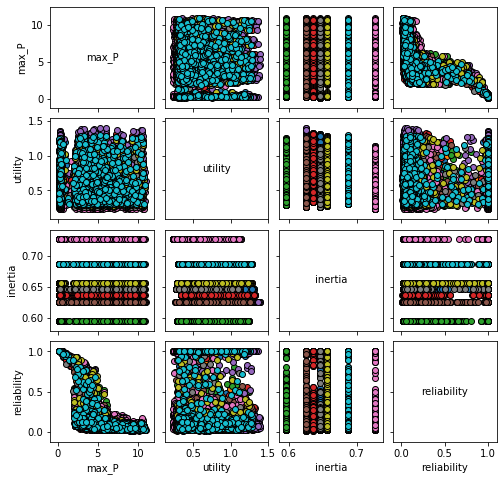

In [41]:
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt

experiments, outcomes = results

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=False)
fig.set_size_inches(8,8)
plt.show()

In [46]:
#The experiments array contains the values for each of the 100 decision levers. 
#This might easily mess up the analysis. 
#Remove these columns from the experiment array. hint: use experiments.drop

new_experiments = experiments.drop(['l' + str(i) for i in 
                     range(2, 100)], axis = 1) 
new_experiments = new_experiments.drop(['l0'], axis = 1) 
new_experiments

,b,delta,mean,q,stdev,scenario,policy,model
0,0.157336,0.930011,0.044374,3.182715,0.003040,3000,12,lakeproblem
1,0.257401,0.983453,0.043668,3.223717,0.001932,3001,12,lakeproblem
2,0.320070,0.977392,0.018481,2.313501,0.001679,3002,12,lakeproblem
3,0.277067,0.983312,0.012646,3.128010,0.003648,3003,12,lakeproblem
4,0.132628,0.983083,0.013844,2.724918,0.003937,3004,12,lakeproblem
...,...,...,...,...,...,...,...,...
9995,0.256421,0.966692,0.022045,3.920578,0.003227,3995,21,lakeproblem
9996,0.194847,0.986882,0.042637,2.602838,0.002485,3996,21,lakeproblem
9997,0.114584,0.952420,0.045540,3.055996,0.002497,3997,21,lakeproblem
9998,0.173661,0.972238,0.016164,2.634657,0.003559,3998,21,lakeproblem


[MainProcess/INFO] no time dimension found in results


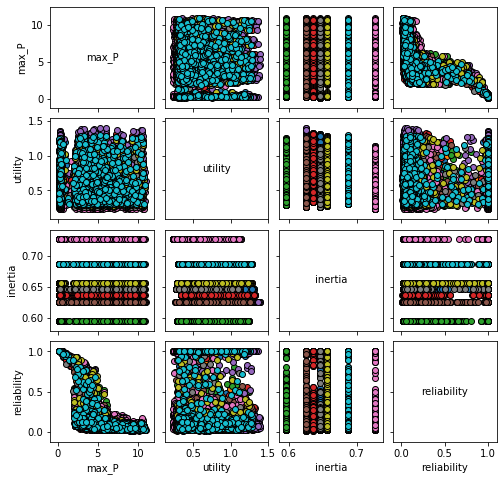

In [47]:
fig, axes = pairs_plotting.pairs_scatter(new_experiments, outcomes, group_by='policy',
                                         legend=False)
fig.set_size_inches(8,8)
plt.show()

In [50]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.323400,0,1.0000,0.323400,0
1,1.000000,0.340421,1,0.9500,0.340421,1
2,1.000000,0.358537,2,0.9020,0.358537,1
3,1.000000,0.377804,3,0.8560,0.377804,1
4,1.000000,0.397786,4,0.8130,0.397786,1
5,1.000000,0.418912,5,0.7720,0.418912,1
6,1.000000,0.441201,6,0.7330,0.441201,2
7,0.999691,0.464511,7,0.6960,0.464511,2
8,0.999691,0.489107,8,0.6610,0.489107,2
9,0.998763,0.515152,9,0.6270,0.515152,2


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


        reproduce coverage  reproduce density
b                    100.0              100.0
q                    100.0              100.0
policy               100.0              100.0
mean                  70.0               70.0
delta                 20.0               20.0
stdev                 20.0               20.0
coverage    0.398894
density     0.965774
id                36
mass          0.1344
mean        0.965774
res_dim            4
Name: 36, dtype: object

                                  box 36                                    \
                                     min                               max   
b                                0.10005                          0.261566   
q                                2.00075                           2.97723   
policy  {12, 13, 14, 15, 16, 19, 20, 21}  {12, 13, 14, 15, 16, 19, 20, 21}   
mean                           0.0139689                         0.0499664   

                                         
                

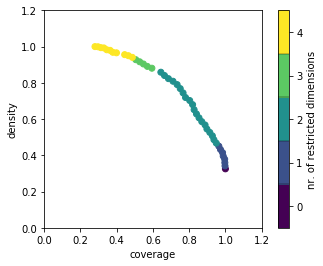

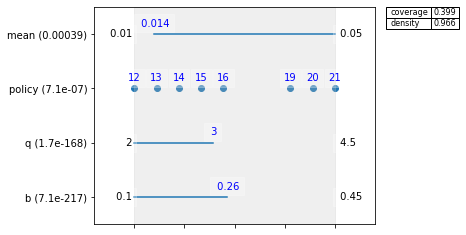

In [69]:
#Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability
from ema_workbench.analysis import prim

x = new_experiments
y = outcomes['reliability'] <0.1
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(36))
box1.inspect(36)
box1.inspect(36, style='graph')

plt.show()

policy [12, 13, 14, 15, 16, 19, 20, 21, 17, 18]


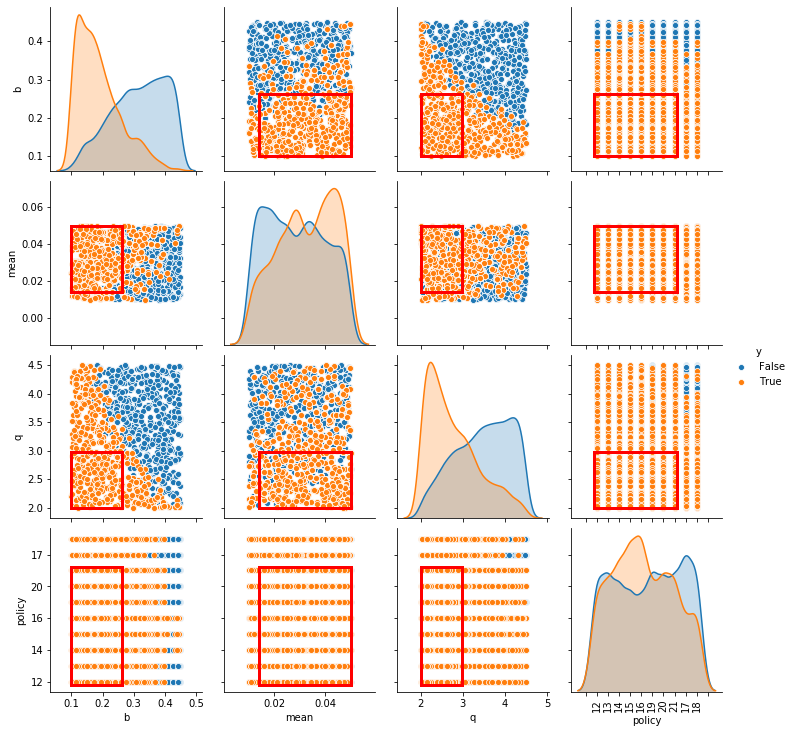

In [70]:
box1.show_pairs_scatter(36)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


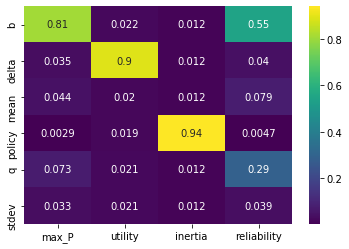

In [71]:
from ema_workbench.analysis import feature_scoring, scenario_discovery_util
import seaborn as sns
x = new_experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

[MainProcess/INFO] model dropped from analysis because only a single category


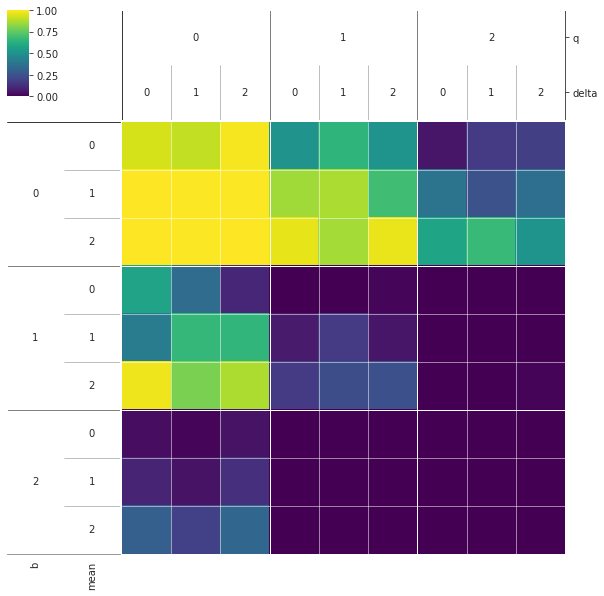

In [72]:
from ema_workbench.analysis import dimensional_stacking

x = new_experiments
y = outcomes['reliability'] <0.1
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()